In [1]:
%pylab --no-import-all notebook
import sys 
sys.path.append("../modules")

Populating the interactive namespace from numpy and matplotlib


In [11]:
import pandas as pd
from copy import copy
import warnings
warnings.filterwarnings('ignore')
import Datasets as dat

In [3]:
import os 
path = os.getcwd()
path = path.replace(path.split('/')[-1],'')

In [4]:
valid_path = path + "Tabulky a výsledky/"

In [5]:
FS1 = pd.read_hdf(valid_path + '/Feature Selection/' +'FeatureSelection_4stavy.h5', 'First_dataset')
FS2 = pd.read_hdf(valid_path + '/Feature Selection/' +'FeatureSelection_4stavy.h5', 'Second_dataset')

In [9]:
f = pd.read_hdf(valid_path + 'Results_4stavy.h5','First_dataset')
s = pd.read_hdf(valid_path + 'Results_4stavy.h5','Second_dataset')

## V tomoto notebooku jsou moje poznámky k výběru přínaků a parametrů pro signály s přídaným 4. stavem

## Labelování
- Nejdříve jsem provedl přeznačení stávajících signálů z 3 stavů na 4 stavy. Toho jsem docílil rozdělením ELMu na začátek a konec.
- Začátek ELMu od nynějška značím "ELM start" a jedná se o část ELMu, konkrétně od jeho začátku po peak (včetně).
    - v reálu se jedná v průměru o 3-4 první hodnoty v ELMu, což jen jen malá část (viz obrázek).  
<img style="float: center;" src="elm.png">
    - V případě, že bych signál nedecimoval (nedownsamploval), bylo by jich o dost víc.
        - Současné signály jsem při "těžbě" downsamploval. Bral jsem každý stý bod. To jsem dělal kvůli původně zamýšlené aplikaci, tzn. predikce v reálném čase, kde bych musel stíhát vše v 50 ms. 
- Konec ELMu značím "ELM end" je zbytek ELMu a to od peaku do konce.


### Náhled před a po přídání dalšího stavu

In [52]:
X1 = dat.load_dataset("first_dataset")
X2 = dat.load_dataset("first_dataset_mod")

<IPython.core.display.Javascript object>


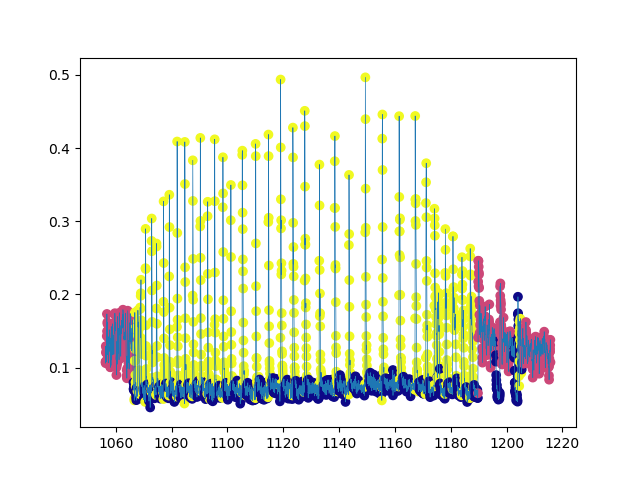

In [68]:
ind = 1
plt.figure("Původně označený signál (3 stavy)")
plt.plot(X1.data[ind][0], X1.data[ind][1], lw=0.5)
plt.scatter(X1.data[ind][0], X1.data[ind][1], c= X1.data[ind][2], cmap= plt.cm.plasma)
plt.show()

<IPython.core.display.Javascript object>


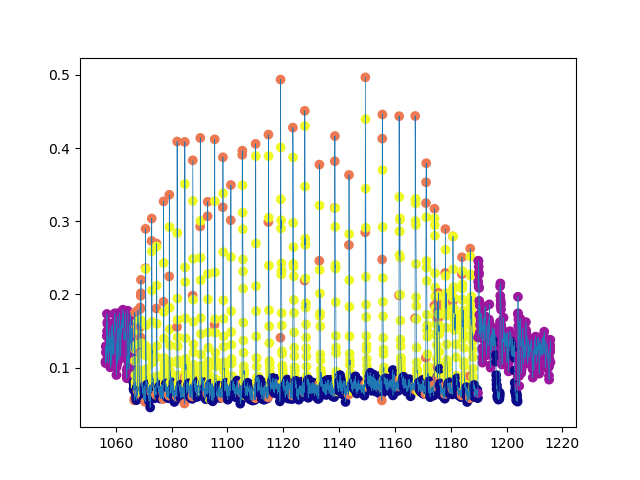

In [67]:
ind = 1
plt.figure("Nově označený signál (4 stavy)")
plt.plot(X2.data[ind][0], X2.data[ind][1], lw=0.5)
plt.scatter(X2.data[ind][0], X2.data[ind][1], c= X2.data[ind][2], cmap= plt.cm.plasma)
plt.show()

## Modely se všemi příznaky
- po přeznačení signálů jsem na ně použil "lesové" modely, konkrétně AdaBoostClassifier a GradientBoostingClassifier s různýmy parametry (zjednodušená GridSearch) pro nalezení těch nejlepších 

GradientBoosting
- dvojice parametrů: 
                     n_estimators = 100, learning_rate=0.1
                     n_estimators = 400, learning_rate=0.1
                     n_estimators = 1000, learning_rate=0.1
                     n_estimators = 1000, learning_rate=0.01
                   
AdaBoost
- dvojice parametrů: 
                     n_estimators = 100, learning_rate=1
                     n_estimators = 400, learning_rate=0.1
                     n_estimators = 400, learning_rate=0.5
                     n_estimators = 1000, learning_rate=0.1
                     n_estimators = 1000, learning_rate=0.01
             
## První dataset

In [87]:
f.loc[f.index.get_level_values('MVar')=='[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]'] #všechny příznaky

Metrika                                                                                                                                               Accuracy  \
Režim                                                                                                                                                            
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                   
Ada   default   100     1.0  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.870   
                1000    0.01 1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.878   
                        0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.883   
                400     0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.883   
                        0.5  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.876   
GB    default   100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.906   
                1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.907   
                        0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.905   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.906   

Metrika                                                                                                                                               F míra  \
Režim                                                                                                                                                  H-mód   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                 
Ada   default   100     1.0  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.903   
                1000    0.01 1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.910   
                        0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.912   
                400     0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.911   
                        0.5  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.909   
GB    default   100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.929   
                1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.930   
                        0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.926   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.928   

Metrika                                                                                                                               

In [91]:
f.loc[f.index.get_level_values('MVar')=='[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]'].sort_values([('F míra','průměrná')],ascending=False).head(3)

Metrika                                                                                                                                               Accuracy  \
Režim                                                                                                                                                            
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                   
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.907   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.906   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.906   

Metrika                                                                                                                                               F míra  \
Režim                                                                                                                                                  H-mód   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                 
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.930   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.928   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.929   

Metrika                                                                                                                                                       \
Režim                                                                                                                                                  L-mód   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                 
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.919   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.916   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.917   

Metrika                                                                                                                                                          \
Režim                                                                                                                                                 ELM start   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                    
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]     0.876   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]     0.875   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]     0.872   

Metrika                                                                                                                       

Lepší výsledky jsou stejně jako minule od GradientBoosting modelu. Pro GB model jsou podle výsledků nejlepší paramety:
- $1000 \text{ stromů s lr} = 0.01$, jehož  průměrná F-míra byla $0.894 \pm 0.027$ . 

Když se ale pořádně podíváme do tabulky, můžeme si všimnout, že na třetím místě je model se **100 stromy a lr=0.1** s průměrnou F-mírou $0.892 \pm 0.028$, který se od nejlepšího liší o **0.2%**(0.02). To znamená, že jsme schopni dosáhnout "stejných" výsledků v mnohem kratším čase s daleko menším počtem parametrů.

Já osobně bych tedy za nejlepší model v tuto chvíli označil právě tento.

## Druhý dataset

In [90]:
s.loc[s.index.get_level_values('MVar')=='[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]'] #všechny příznaky

Metrika                                                                                                                                               Accuracy  \
Režim                                                                                                                                                            
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                   
Ada   default   100     1.0  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.811   
                1000    0.01 1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.813   
                        0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.824   
                400     0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.822   
                        0.5  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.817   
GB    default   100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.843   
                1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.843   
                        0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.836   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.839   

Metrika                                                                                                                                               F míra  \
Režim                                                                                                                                                  H-mód   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                 
Ada   default   100     1.0  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.813   
                1000    0.01 1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.827   
                        0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.828   
                400     0.1  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.830   
                        0.5  1        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.822   
GB    default   100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.849   
                1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.848   
                        0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.840   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.844   

Metrika                                                                                                                               

In [92]:
s.loc[s.index.get_level_values('MVar')=='[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]'].sort_values([('F míra','průměrná')],ascending=False).head(3)

Metrika                                                                                                                                               Accuracy  \
Režim                                                                                                                                                            
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                   
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.843   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.843   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]    0.839   

Metrika                                                                                                                                               F míra  \
Režim                                                                                                                                                  H-mód   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                 
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.848   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.849   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.844   

Metrika                                                                                                                                                       \
Režim                                                                                                                                                  L-mód   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                 
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.858   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.858   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  0.853   

Metrika                                                                                                                                                          \
Režim                                                                                                                                                 ELM start   
Model criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM                        EMM                       MVar                                                    
GB    default   1000    0.01 3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]     0.724   
                100     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]     0.720   
                400     0.1  3        1       1   1   [4, 6, 8, 10, 12, 14, 16] [4, 6, 8, 10, 12, 14, 16] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]     0.698   

Metrika                                                                                                                       

U druhého datasetu je stav stejný jako u prvního. Nejlepší model je podle výsledků stejný, a to GB s 1000 stromy a lr=0.01. Jeho průměrná F-míra odpovídá $0.791 \pm 0.112$. 
Model jen se 100 stromy se ale nyní s přehledem umístil na druhém místě. Se ztrátou **0.1%** (0.001) však můžeme konstatovat, že je totožně kvalitní jako první zmiňovaný model. Rozdíl 0.01 odpovídá tomu, že model udělal v průměru o 33 chyb více (délky signálů se liší, průměrně ale obashují 3281 bodů).

Většina chyb, kterých se modely dopouští v druhém datasetu, pochází ze dvou hodně zašuměných signálů.
Konkrétně 2. a 6. signál jsou vždy nejhůře klasifikované signály. Nejvyšší dosažená přesnost (Accuracy) byla asi $68%$ u obou. Může to plynout z toho, že tyto signály mají oproti ostatním odlišný charakter, a když jeden z nich vyjmu kvůli Cross-Fold validaci, má model možnost trénovat jen na jednom z těchto signálů. To však nastačí k tomu, aby se naučil podobné signály dobře klasifikovat. 

## Feature Selection
Z předchozích experimentů vím, že jsem schopen dosahovat stejně kvalitních predikcí i s mnohem menším množstvím příznaků. Narozdíl od předchozích testů budu zde používat pouze metodu **Select From Model**, ve které nechám ohodnotit příznaky přímo modely, které chci použít. Všechny modely obsahující rozhodovací stromy a i některé jiné mají atribut __feature_importances__, podle něhož lze zjistit, jak moc byl daný příznak použit k rozhodnutí.

Celkový počet příznaků je 29. Já zde budu používat tři různé počty vybraných příznaků, a to 15 (medián), 10, 5 resp. 15 nejlepších, 10 nejlepších a 5 nejlepších. Ohodnocení a výběry jednotlivých příznaků jsou uvedeny v tabulkách níže.

(True/False) u výběru značí, jestli byl příznak vybrán do skupiny nebo ne.

Legenda: 
- 1.d SGF = první derivace pomocí Savitzky-golay filtru
- 2.d SGF = druhá derivace pomocí Savitzky-golay filtru
- MM = klouzavý průměr (Moving mean)
- EMM = exponenciálně tlumený klouzavý průměr
- MV = klouzavý rozptyl (Moving Variance)

In [105]:
FS1 # pro první dataset

Důležitost podle metody          Nejlepších 15          Nejlepších 10  \
Feature           GradientBoost AdaBoost GradientBoost AdaBoost GradientBoost   
H_alpha                   0.095    0.064          True     True          True   
1.d SGF                   0.201    0.240          True     True          True   
2.d SGF                   0.100    0.037          True     True          True   
MM 4                      0.027    0.014          True    False          True   
MM 6                      0.011    0.020         False    False         False   
MM 8                      0.014    0.017         False    False         False   
MM 10                     0.019    0.014          True    False         False   
MM 12                     0.016    0.013         False    False         False   
MM 14                     0.021    0.036          True     True         False   
MM 16                     0.047    0.037          True     True          True   
EMM 4                     0.029    0.042          True     True          True   
EMM 6                     0.017    0.032         False     True         False   
EMM 8                     0.009    0.002         False    False         False   
EMM 10                    0.008    0.002         False    False         False   
EMM 12                    0.011    0.031         False     True         False   
EMM 14                    0.010    0.025         False     True         False   
EMM 16                    0.040    0.014          True    False          True   
MV 5                      0.023    0.043          True     True          True   
MV 6                      0.014    0.023         False    False         False   
MV 7                      0.014    0.028         False     True         False   
MV 8                      0.014    0.008         False    False         False   
MV 9                      0.020    0.008          True    False         False   
MV 10                     0.013    0.027         False     True         False   
MV 11                     0.018    0.029         False     True         False   
MV 12                     0.018    0.026          True     True         False   
MV 13                     0.023    0.009          True    False         False   
MV 14                     0.023    0.002          True    False          True   
MV 15                     0.014    0.021         False    False         False   
MV 16                     0.130    0.138          True     True          True   

                  Nejlepších 5           
Feature AdaBoost GradientBoost AdaBoost  
H_alpha     True          True     True  
1.d SGF     True          True     True  
2.d SGF     True          True    False  
MM 4       False         False    False  
MM 6       False         False    False  
MM 8       False         False    False  
MM 10      False         False    False  
MM 12      False         False    False  
MM 14       True         False    False  
MM 16       True          True    False  
EMM 4       True         False     True  
EMM 6       True         False    False  
EMM 8      False         False    False  
EMM 10     False         False    False  
EMM 12      True         False    False  
EMM 14     False         False    False  
EMM 16     False         False    False  
MV 5        True         False     True  
MV 6       False         False    False  
MV 7       False         False    False  
MV 8       False         False    False  
MV 9       False         False    False  
MV 10      False         False    False  
MV 11      False         False    False  
MV 12      False         False    False  
MV 13      False         False    False  
MV 14      False         False    False  
MV 15      False         False    False  
MV 16       True          True     True

In [104]:
FS2 # pro druhý dataset

Důležitost podle metody          Nejlepších 15          Nejlepších 10  \
Feature           GradientBoost AdaBoost GradientBoost AdaBoost GradientBoost   
H_alpha                   0.089    0.046          True     True          True   
1.d SGF                   0.193    0.237          True     True          True   
2.d SGF                   0.097    0.040          True     True          True   
MM 4                      0.028    0.018          True    False          True   
MM 6                      0.024    0.062          True     True          True   
MM 8                      0.016    0.011         False    False         False   
MM 10                     0.013    0.006         False    False         False   
MM 12                     0.011    0.004         False    False         False   
MM 14                     0.016    0.024         False     True         False   
MM 16                     0.052    0.108          True     True          True   
EMM 4                     0.038    0.016          True    False          True   
EMM 6                     0.018    0.013          True    False         False   
EMM 8                     0.018    0.002          True    False         False   
EMM 10                    0.012    0.008         False    False         False   
EMM 12                    0.014    0.008         False    False         False   
EMM 14                    0.012    0.004         False    False         False   
EMM 16                    0.025    0.012          True    False          True   
MV 5                      0.030    0.029          True     True          True   
MV 6                      0.011    0.026         False     True         False   
MV 7                      0.013    0.006         False    False         False   
MV 8                      0.012    0.023         False     True         False   
MV 9                      0.016    0.010         False    False         False   
MV 10                     0.012    0.012         False    False         False   
MV 11                     0.014    0.030         False     True         False   
MV 12                     0.015    0.025         False     True         False   
MV 13                     0.018    0.020          True     True         False   
MV 14                     0.017    0.031          True     True         False   
MV 15                     0.018    0.028          True     True         False   
MV 16                     0.147    0.141          True     True          True   

                  Nejlepších 5           
Feature AdaBoost GradientBoost AdaBoost  
H_alpha     True          True     True  
1.d SGF     True          True     True  
2.d SGF     True          True    False  
MM 4       False         False    False  
MM 6        True         False     True  
MM 8       False         False    False  
MM 10      False         False    False  
MM 12      False         False    False  
MM 14      False         False    False  
MM 16       True          True     True  
EMM 4      False         False    False  
EMM 6      False         False    False  
EMM 8      False         False    False  
EMM 10     False         False    False  
EMM 12     False         False    False  
EMM 14     False         False    False  
EMM 16     False         False    False  
MV 5        True         False    False  
MV 6       False         False    False  
MV 7       False         False    False  
MV 8       False         False    False  
MV 9       False         False    False  
MV 10      False         False    False  
MV 11       True         False    False  
MV 12      False         False    False  
MV 13      False         False    False  
MV 14       True         False    False  
MV 15       True         False    False  
MV 16       True          True     True

In [125]:
print(FS1.index[FS1[('Nejlepších 15','AdaBoost')]==1].values)

['H_alpha' '1.d SGF' '2.d SGF' 'MM 14' 'MM 16' 'EMM 4' 'EMM 6' 'EMM 12'
 'EMM 14' 'MV 5' 'MV 7' 'MV 10' 'MV 11' 'MV 12' 'MV 16']


### GradientBoost
####  První dataset
- výběr 15 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 4, MM 10, MM 14, MM 16, EMM 4, EMM 16, MV 5, MV 9, MV 12, MV 13, MV 14, MV 16 ]
- výběr 10 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 4, MM 16, EMM 4, EMM 16, MV 5, MV 14, MV 16 ]
- výběr 5 nejlepších:  [ H_alpha, 1.d SGF, 2.d SGF, MM 16, MV 16 ]

#### Druhý dataset
- výběr 15 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 4, MM 6, MM 16, EMM 4, EMM 6, EMM 8, EMM 16, MV 5, MV 13, MV 14, MV 15, MV 16 ]
- výběr 10 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 4, MM 6, MM 16, EMM 4, EMM 16, MV 5, MV 16 ]
- výběr 5 nejlepších:  [ H_alpha, 1.d SGF, 2.d SGF, MM 16, MV 16 ]

### AdaBooost
#### První dataset
- výběr 15 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 14, MM 16, EMM 4, EMM 6, EMM 12, EMM 14, MV 5, MV 7, MV 10, MV 11, MV 12, MV 16 ]
- výběr 10 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 14, MM 16, EMM 4, EMM 6, EMM 12, MV 5, MV 16 ]
- výběr 5 nejlepších:  [ H_alpha, 1.d SGF, EMM 4, MV 5, MV 16 ]

#### Druhý dataset
- výběr 15 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 6, MM 14, MM 16, MV 5, MV 6, MV 8, MV 11, MV 12, MV 13, MV 14, MV 15, MV 16 ]
- výběr 10 nejlepších: [ H_alpha, 1.d SGF, 2.d SGF, MM 6, MM 16, MV 5, MV 11, MV 14, MV 15, MV 16 ]
- výběr 5 nejlepších:  [ H_alpha, 1.d SGF, MM 6, MM 16, MV 16 ]

## Výsledky modelů s vybranými příznaky
- Modely a vybranými příznaky jsem seřadil podle průměrné F-míry

### První dataset
#### GradientBoost


In [152]:
fv = f.loc[f.index.get_level_values('MVar')!='[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]'].sort_values([('F míra','průměrná')],ascending=False)
fv.loc['GB'].head(10)

Metrika                                                                                        Accuracy  \
Režim                                                                                                     
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM              EMM     MVar                              
default   100     0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]               0.907   
          400     0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]    0.907   
          1000    0.01 3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]    0.907   
                                                [4, 16]         [4, 16] [5, 14, 16]               0.907   
          100     0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]    0.906   
          400     0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]               0.906   
          1000    0.01 3        1       1   1   [16]            0       [16]                      0.904   
                  0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]    0.904   
          100     0.1  3        1       1   1   [16]            0       [16]                      0.904   
          1000    0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]               0.904   

Metrika                                                                                        F míra  \
Režim                                                                                           H-mód   
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM              EMM     MVar                            
default   100     0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]             0.929   
          400     0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.928   
          1000    0.01 3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.929   
                                                [4, 16]         [4, 16] [5, 14, 16]             0.929   
          100     0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.928   
          400     0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]             0.928   
          1000    0.01 3        1       1   1   [16]            0       [16]                    0.928   
                  0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.926   
          100     0.1  3        1       1   1   [16]            0       [16]                    0.928   
          1000    0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]             0.926   

Metrika                                                                                                \
Režim                                                                                           L-mód   
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM              EMM     MVar                            
default   100     0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]             0.917   
          400     0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.917   
          1000    0.01 3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.919   
                                                [4, 16]         [4, 16] [5, 14, 16]             0.917   
          100     0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.917   
          400     0.1  3        1       1   1   [4, 16]         [4, 16] [5, 14, 16]             0.916   
          1000    0.01 3        1       1   1   [16]            0       [16]                    0.912   
                  0.1  3        1       1   1   [4, 10, 14, 16] [4, 16] [5, 9, 12, 13, 14, 16]  0.915   
          100     0.1  3        1       1   1   [16]            0       [16]           

Jako nejlepší kombinace modelu a výběru příznaků se jeví __model obsahující 100 stromů s learning ratem 0.1 a výběr 10 nejlepších příznaků__ s průměrnou F-mírou __0.894 $\pm$ 0.029__.
Zajímavější je podle mě, ale 8. nejlepší kombinace tzn. __model se 100 stromy, lr 0.1 a 5 nejlepších příznaků__. Od nejlepšího se liší o __0.3%__ (0.003) v průměrné F-míře, ale využívá pouze 5 nejlepších příznaků.  

#### AdaBoost

In [157]:
fv.loc['Ada'].head(5)

Metrika                                                                                       Accuracy  \
Režim                                                                                                    
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM       EMM            MVar                              
default   1000    0.1 1        1       1   0   0        [4]            [5, 16]                   0.880   
                                           1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]    0.884   
                                                        [4, 6, 12]     [5, 16]                   0.881   
          400     0.1 1        1       1   1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]    0.883   
                                           0   0        [4]            [5, 16]                   0.880   

Metrika                                                                                       F míra  \
Režim                                                                                          H-mód   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM       EMM            MVar                            
default   1000    0.1 1        1       1   0   0        [4]            [5, 16]                 0.910   
                                           1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]  0.911   
                                                        [4, 6, 12]     [5, 16]                 0.909   
          400     0.1 1        1       1   1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]  0.910   
                                           0   0        [4]            [5, 16]                 0.911   

Metrika                                                                                               \
Režim                                                                                          L-mód   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM       EMM            MVar                            
default   1000    0.1 1        1       1   0   0        [4]            [5, 16]                 0.900   
                                           1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]  0.914   
                                                        [4, 6, 12]     [5, 16]                 0.911   
          400     0.1 1        1       1   1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]  0.917   
                                           0   0        [4]            [5, 16]                 0.908   

Metrika                                                                                                  \
Režim                                                                                         ELM start   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM       EMM            MVar                               
default   1000    0.1 1        1       1   0   0        [4]            [5, 16]                    0.712   
                                           1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]     0.684   
                                                        [4, 6, 12]     [5, 16]                    0.677   
          400     0.1 1        1       1   1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]     0.662   
                                           0   0        [4]            [5, 16]                    0.677   

Metrika                                                                                                \
Režim                                                                                         ELM end   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM       EMM            MVar                             
default   1000    0.1 1        1       1   0   0        [4]            [5, 16]                  0.828   
                                           1   [14, 16] [4, 6, 12, 14] [5, 7, 10, 11, 12, 16]   0.833   
                                                        [4, 6, 12]     [5, 16]                  0.832  

AdaBoost se nemůže s GradientBoostem měřit. Model (AdaBoost) s nejvyšší průměrnou F-mírou je o 5%(0.05) horší, než nejlepší GB. Navíc je potřeba více stromů. 

### Druhý dataset
#### GradientBoost

In [158]:
sv = s.loc[s.index.get_level_values('MVar')!='[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]'].sort_values([('F míra','průměrná')],ascending=False)

In [160]:
sv.loc['GB'].head(5)

Metrika                                                                                      Accuracy  \
Režim                                                                                                   
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM         EMM           MVar                           
default   1000    0.01 3        1       1   1   [16]       0             [16]                   0.847   
                                                [4, 6, 16] [4, 16]       [5, 16]                0.846   
          100     0.1  3        1       1   1   [16]       0             [16]                   0.845   
          1000    0.01 3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]    0.844   
          100     0.1  3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]    0.844   

Metrika                                                                                      F míra  \
Režim                                                                                         H-mód   
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM         EMM           MVar                         
default   1000    0.01 3        1       1   1   [16]       0             [16]                 0.852   
                                                [4, 6, 16] [4, 16]       [5, 16]              0.851   
          100     0.1  3        1       1   1   [16]       0             [16]                 0.851   
          1000    0.01 3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]  0.849   
          100     0.1  3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]  0.849   

Metrika                                                                                              \
Režim                                                                                         L-mód   
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM         EMM           MVar                         
default   1000    0.01 3        1       1   1   [16]       0             [16]                 0.855   
                                                [4, 6, 16] [4, 16]       [5, 16]              0.855   
          100     0.1  3        1       1   1   [16]       0             [16]                 0.855   
          1000    0.01 3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]  0.857   
          100     0.1  3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]  0.858   

Metrika                                                                                                 \
Režim                                                                                        ELM start   
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM         EMM           MVar                            
default   1000    0.01 3        1       1   1   [16]       0             [16]                    0.722   
                                                [4, 6, 16] [4, 16]       [5, 16]                 0.728   
          100     0.1  3        1       1   1   [16]       0             [16]                    0.720   
          1000    0.01 3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]     0.722   
          100     0.1  3        1       1   1   [4, 6, 16] [4, 6, 8, 16] [5, 13, 14, 15, 16]     0.717   

Metrika                                                                                               \
Režim                                                                                        ELM end   
criterion N_estim lr   MaxDepth H-alpha 1.D 2.D MM         EMM           MVar                          
default   1000    0.01 3        1       1   1   [16]       0             [16]                  0.748   
                                                [4, 6, 16] [4, 16]       [5, 16]               0.739   
          100     0.1  3        1       1   1   [16]       0             [16]                  0.744   
          1000    0.01 3        1   

#### AdaBoost

In [161]:
sv.loc['Ada'].head(5)

Metrika                                                                                          Accuracy  \
Režim                                                                                                       
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM          EMM MVar                                         
default   1000    0.1 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]    0.824   
                                               [6, 16]     0   [5, 11, 14, 15, 16]                  0.824   
                                           0   [6, 16]     0   [16]                                 0.823   
          400     0.1 1        1       1   1   [6, 16]     0   [5, 11, 14, 15, 16]                  0.820   
                  0.5 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]    0.816   

Metrika                                                                                          F míra  \
Režim                                                                                             H-mód   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM          EMM MVar                                       
default   1000    0.1 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]  0.828   
                                               [6, 16]     0   [5, 11, 14, 15, 16]                0.828   
                                           0   [6, 16]     0   [16]                               0.831   
          400     0.1 1        1       1   1   [6, 16]     0   [5, 11, 14, 15, 16]                0.828   
                  0.5 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]  0.822   

Metrika                                                                                                  \
Režim                                                                                             L-mód   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM          EMM MVar                                       
default   1000    0.1 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]  0.841   
                                               [6, 16]     0   [5, 11, 14, 15, 16]                0.838   
                                           0   [6, 16]     0   [16]                               0.840   
          400     0.1 1        1       1   1   [6, 16]     0   [5, 11, 14, 15, 16]                0.844   
                  0.5 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]  0.828   

Metrika                                                                                                     \
Režim                                                                                            ELM start   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM          EMM MVar                                          
default   1000    0.1 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]     0.626   
                                               [6, 16]     0   [5, 11, 14, 15, 16]                   0.623   
                                           0   [6, 16]     0   [16]                                  0.603   
          400     0.1 1        1       1   1   [6, 16]     0   [5, 11, 14, 15, 16]                   0.588   
                  0.5 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]     0.601   

Metrika                                                                                                   \
Režim                                                                                            ELM end   
criterion N_estim lr  MaxDepth H-alpha 1.D 2.D MM          EMM MVar                                        
default   1000    0.1 1        1       1   1   [6, 14, 16] 0   [5, 6, 8, 11, 12, 13, 14, 15, 16]   0.704   
                                               [6, 16]     0   [5, 11, 14, 15, 16]                 0

I u druhého datasetu se ukazuje GB být mnohem kvalitnějším modelem (lepší metoda boostování), než Ada. 
U GB je podle mě na tomto datasetu nejlepší model se __100 stromy, lr 0.1 a výběrem 5 nejlepších příznaků__. I přestože je až na 3. místě podle průměrné F-míry. Důvod je stejný jako dříve, tzn. rozdíl 0.2% není nijak významný a stačí použít jen desetinu stromů oprotí nejlépe hodnocenému. 

U Ady bych za nelepší model označíl také třetí umístěný s __1000 stromy, lr 0.1 a výběrem 5 nejlepších příznaků__. Důvod je obdobný jako u GB. Rozdíl oproti prvnímu je 0.2%, ale s třetinou příznaků.